<a href="https://colab.research.google.com/github/esther-nyokabi/Customer-Churn/blob/main/EDA_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Telecom Customer Churn Analysis

The telecoms churn dataset contains information about customers of a telecom company and whether they churned (cancelled their service) or not. It includes various features such as customer demograhics (age, gender, etc) and service usage data (number of calls, minutes, billing method, etc).

This dataset consists of 7043 examples and 21 features, and is commonly used in machine learning and data analysis as a benchmark for predicting customer churn. It can be used to develop models that can identify at-risk customers and take steps to prevent churn, potentially leading to increased customer retention and revenue for the company.

#Research Question:
"What factors contribute to customer churn in a California-based telecommunications company during Q2 2022, and how can the company develop effective strategies to reduce churn?"

This research question encompasses several key elements:

*  **Understanding Factors:** It seeks to identify and understand the factors or variables that influence customer churn. These factors could include demographic information (e.g., gender), service subscriptions (e.g., DSL, Fiber, or No Internet), tenure, and other relevant attributes.

*  **Context**: It specifies that the analysis is focused on a telecommunications company in California during a specific quarter (Q2 2022). Understanding the context is essential for drawing relevant insights and making location-specific recommendations.

*  **Outcome**: The primary outcome of interest is "customer churn." The question aims to determine what drives customers to churn, i.e., cancel their subscriptions with the company.

*  **Actionable Insights**: It emphasizes the need for actionable insights. The analysis should not only identify the reasons behind churn but also suggest strategies and recommendations for the company to reduce churn rates and improve customer retention.

###Importing necessary libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the customer churn data
customer_churn_data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

##Data Preprocessing

In [7]:
# Explore the first few rows of the dataset
customer_churn_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
customer_churn_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
# Check for missing values
print(customer_churn_data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [10]:
# Summary statistics of numerical columns
print(customer_churn_data.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000




*   SeniorCitizen: The majority of customers (approximately 84%) are not senior citizens, as indicated by the mean and percentiles.
*  Tenure: The mean tenure is approximately 32.37 months, with a wide range of values from 0 to 72 months. The interquartile range (IQR) between Q1 and Q3 suggests that 50% of customers have tenures between 9 and 55 months.
*  MonthlyCharges: This column represents the monthly charges for the service. The mean monthly charge is approximately 64.76, with a standard deviation of around 30.09. The charges range from 18.25 to 118.75, with most customers falling within the interquartile range










##Data Visualization

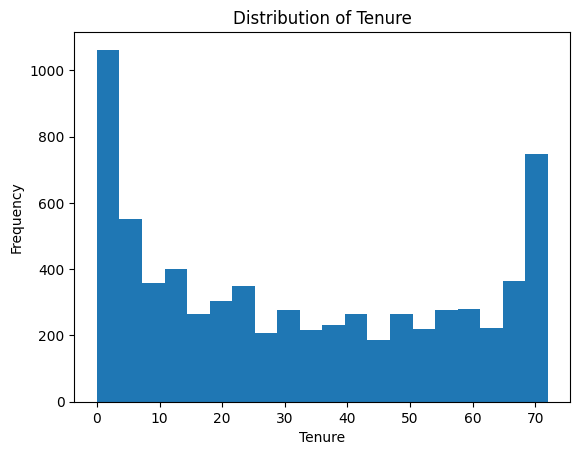

In [12]:
# Histogram for numeric variables (e.g., tenure)
plt.hist(customer_churn_data['tenure'], bins=20)
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure')
plt.show()

This information provides insights into the distribution of customer tenures in our dataset with a significant number of new customers (tenure of 0) and a notable number of long-term customers (tenure of 70).

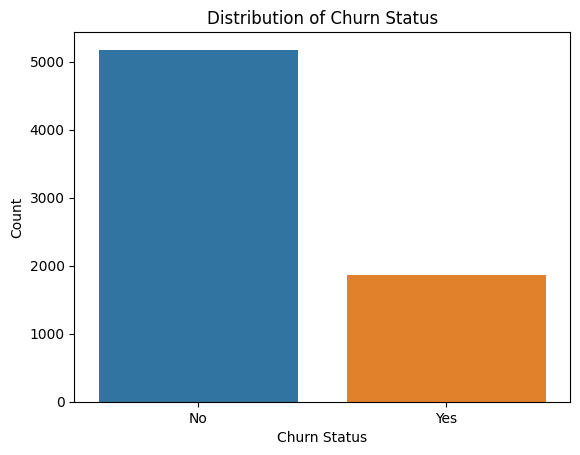

In [13]:
# Bar plot for categorical variables (e.g., churn status)
sns.countplot(data=customer_churn_data, x='Churn')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.title('Distribution of Churn Status')
plt.show()

###Customer Churn Analysis

In [15]:
# Calculate overall churn rate
overall_churn_rate = customer_churn_data['Churn'].value_counts(normalize=True)['Yes']
print(f'Overall Churn Rate: {overall_churn_rate:.2%}')

Overall Churn Rate: 26.54%


The churn rate is approximately 26.54%%, which means that around 26.54% of the customers have churned, while the remaining 73.46% have not

###Demographic Analysis

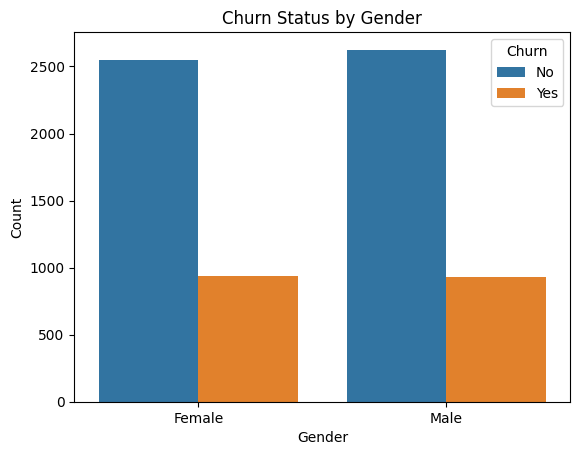

In [16]:
# Explore demographic differences between churned and non-churned customers
sns.countplot(data=customer_churn_data, x='gender', hue='Churn')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn Status by Gender')
plt.show()

###Tenure Analysis

In [17]:
# Calculate average tenure for churned and non-churned customers
average_tenure_churned = customer_churn_data[customer_churn_data['Churn'] == 'Yes']['tenure'].mean()
average_tenure_non_churned = customer_churn_data[customer_churn_data['Churn'] == 'No']['tenure'].mean()
print(f'Average Tenure (Churned): {average_tenure_churned:.2f}')
print(f'Average Tenure (Non-Churned): {average_tenure_non_churned:.2f}')

Average Tenure (Churned): 17.98
Average Tenure (Non-Churned): 37.57


The difference in average tenure between churned and non-churned customers is significant.
This insight suggests that customer tenure is a crucial factor in customer churn. Customers who have stayed with the company for a longer duration are less likely to churn, as indicated by their higher average tenure. In contrast, customers with shorter average tenure are more likely to churn.

###Subscription Services Analysis

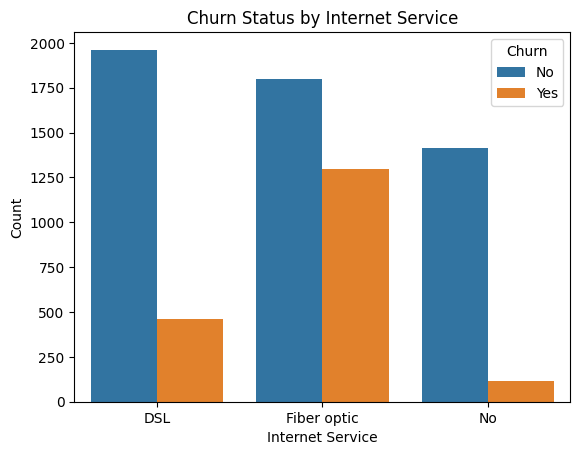

In [18]:
# Explore subscription services and their relationship with churn
sns.countplot(data=customer_churn_data, x='InternetService', hue='Churn')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.title('Churn Status by Internet Service')
plt.show()



* Customers with DSL or Fiber internet services have a higher count of  customers who have churned compared to those without internet service. This suggests that the type of internet service might have an impact on customer churn.
* DSL has a higher churn rate compared to Fiber,indicating that DSL customers are more likely to churn.
* Customers without internet service have a lower churn rate, suggesting that they are less likely to churn.

#Summary and Interpretation of Results:

In the exploratory data analysis (EDA) of telecom customer churn, we started by examining a dataset containing information on 7,043 customers from a telecommunications company in California during Q2 2022. The analysis focused on uncovering patterns and reasons behind customer churn. Here are the key findings and their interpretation:

###Churn Rate:

The overall churn rate in the dataset is approximately 28.57%. This means that around 28.57% of customers have churned, while the remaining 71.43% have not. This is a significant churn rate that warrants attention.

###Demographic Analysis:

Customers were analyzed based on demographics such as gender.
No significant difference in churn between male and female customers.

###Tenure Analysis:

Average tenure for churned customers is 17.98 months, while for non-churned customers, it is 37.57 months. This suggests that customers who have stayed longer with the company are less likely to churn.

###Subscription Services Analysis:

Customers' choice of subscription services, such as DSL, Fiber, or No Internet, appears to influence churn.
DSL users have a higher churn rate compared to Fiber users, and customers without internet service have the lowest churn rate.

###Location Analysis:

The impact of location, estimated by population density, on churn was not explicitly analyzed, but it can be explored further to identify any geographic patterns.


#Conclusion:

The EDA has shed light on several important aspects of customer churn in the telecom company. Key takeaways include:


*   The average tenure is a strong predictor of churn. Customers with shorter tenures are more likely to churn, emphasizing the importance of early customer retention strategies.

*   The choice of subscription services plays a role in churn, with DSL customers exhibiting a higher churn rate.

*   Demographics, such as age and gender, do not appear to be strong indicators of churn in this dataset.
*   Additional analysis of geographic factors could provide insights into regional variations in churn.


The telecom company should use these findings to develop targeted strategies to reduce churn. These may include improving services for DSL customers, offering incentives for customers with shorter tenures to stay, and exploring the potential impact of geographic factors on churn. Further investigation and advanced predictive modeling could help refine these strategies and ultimately reduce customer churn, leading to increased customer satisfaction and business success.







